
# 03 – Local Outlier Factor (LOF)

**Module:** Anomaly & Fraud Detection  
**Folder:** Classical ML Methods

This notebook demonstrates **Local Outlier Factor (LOF)**, a density-based unsupervised anomaly detection method.


## Objective

Build a workflow that:
- Detects anomalies based on local density deviations  
- Scores points relative to their neighbors  
- Identifies outliers in multivariate datasets  
- Integrates into pipelines for monitoring


## Design Principles

✔ Unsupervised and density-based  
✔ Multivariate support  
✔ Local anomaly scoring  
✔ Pipeline-ready for production


## Imports and Setup



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

## Simulated Dataset

In [26]:
data_normal = np.random.normal(50, 5, size=(1000, 2))
data_anomalies = np.array([[80, 80], [90, 90], [100, 100]])
data = np.vstack([data_normal, data_anomalies])
df = pd.DataFrame(data, columns=['feature_1','feature_2'])

## Fit LOF

In [29]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
lof.fit(data_normal)  # train on normal data

# Predict on entire dataset
df['lof_score'] = lof.decision_function(df)
df['anomaly_flag'] = lof.predict(df.iloc[:, :-1])

# Convert output to 0 = normal, 1 = anomaly
df['anomaly_flag'] = df['anomaly_flag'].apply(lambda x: 0 if x==1 else 1)

## Summary

In [32]:
print(df['anomaly_flag'].value_counts())

anomaly_flag
0    991
1     12
Name: count, dtype: int64


## Visualization

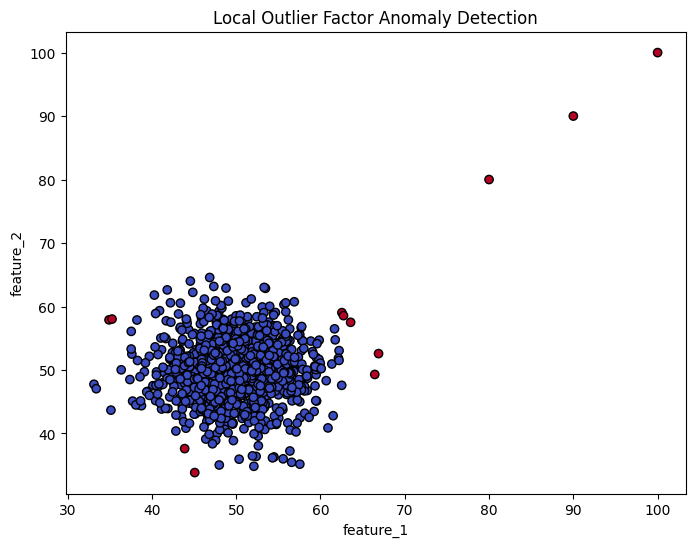

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df['feature_1'], df['feature_2'], c=df['anomaly_flag'], cmap='coolwarm', edgecolor='k')
plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()


##  Integration Notes

- LOF computes anomaly scores based on local density deviations  
- Contamination parameter sets expected fraction of outliers  
- Can be combined with other anomaly detection methods in ensembles  
- Decision scores are interpretable for alerting and thresholding


## Production Checklist

✔ Train on historical/normal data  
✔ Use novelty=True for prediction on new data  
✔ Contamination parameter tuned for expected anomaly rate  
✔ Integrate into monitoring or alerting pipelines


## Key Takeaways

- LOF is effective for density-based local anomaly detection  
- Multivariate and unsupervised  
- Produces anomaly scores and binary flags  
- Useful for operational monitoring and alerting


## Next Steps

- Compare LOF performance with Isolation Forest and One-Class SVM  
- Integrate into ensemble anomaly detection pipeline  
- Monitor anomaly score drift in production over time